In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import mat73
from scipy.ndimage import convolve1d

In [2]:
path = '../datasets/dataset2_grasping-task/'
fname = os.path.join(path, 'Dataset2.mat')
data = mat73.loadmat(fname)

In [3]:
monkeyL = data['monkeyL']
spks = monkeyL['spikes']
spks = np.asarray(spks)

fs = 1000 # original binning at 1kHz
t_stamps = np.arange(0,spks.shape[0]/fs, 1/fs)

force = monkeyL['force']-1 # zero indexing 
grip = monkeyL['grip']-1 # zero indexing 

In [4]:
# defining task structure
trans = ['CUE_ON', 'CUE_OFF', 'GO'] # cues
trans_ind = [0.7,1,2] # time at which transition occurs (in seconds)

all_cond = ['SG-HF', 'SG-LF', 'PG-HF', 'PG-LF']
all_cond_ind = [(0,0), (0,1), (1,0), (1,1)]

# plotting
cond_colors = ['C1', 'C2', 'C3', 'C4'] # TODO: change these to match grip condition

In [5]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

Text(0.5, 1.0, 'smoothing kernel')

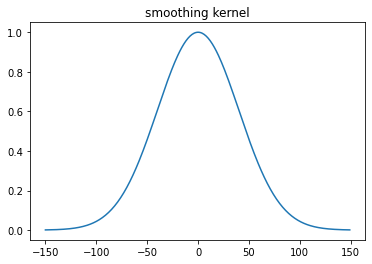

In [6]:
x_kernel = np.arange(-150,150)
y_kernel = gaussian(x_kernel, mu=0, sig=40)
plt.plot(x_kernel, y_kernel)
spks_conv = convolve1d(spks, y_kernel, axis=0)
plt.title('smoothing kernel')

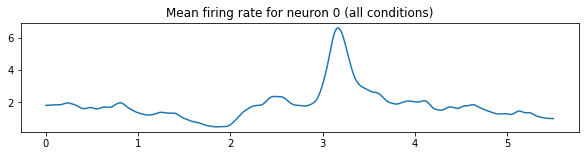

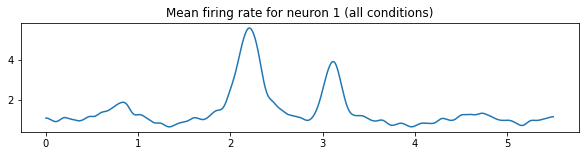

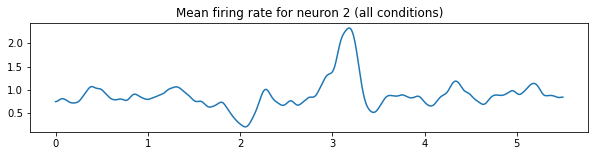

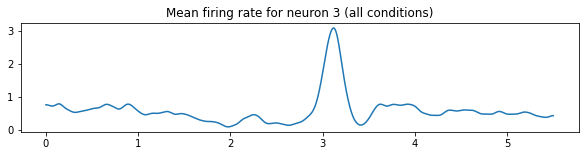

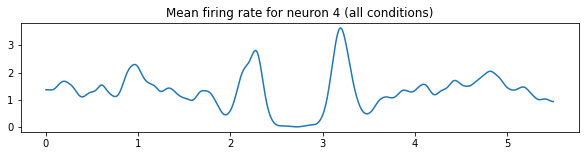

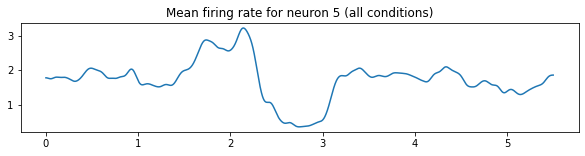

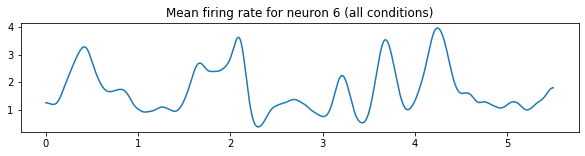

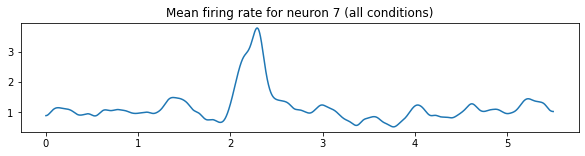

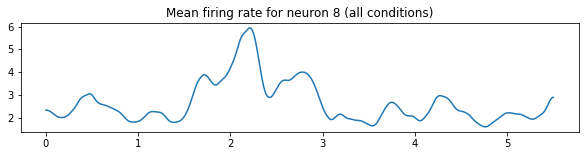

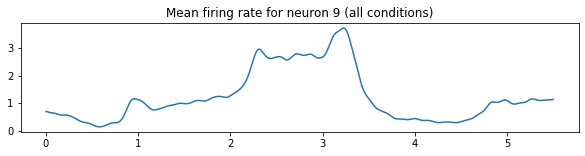

In [7]:
for i in range(10):
    plt.figure(figsize=(10,2))
    plt.plot(t_stamps, np.mean(spks_conv[:,i,:], 1))
    plt.title(f'Mean firing rate for neuron {i} (all conditions)')

hello
0
1
2


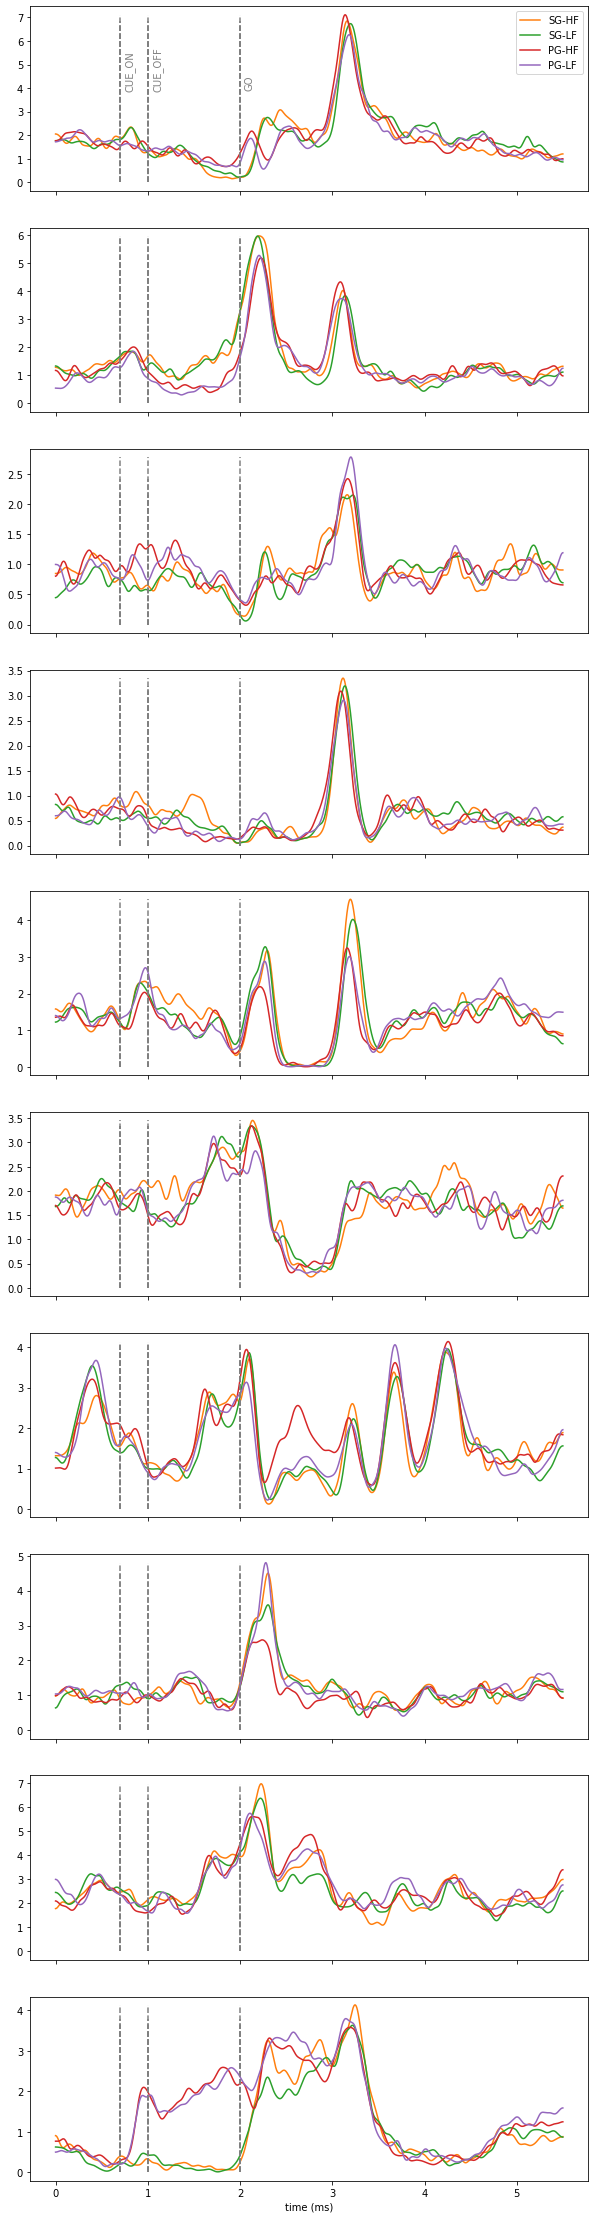

In [8]:
n_plot = 10 
_, axs = plt.subplots(n_plot, 1, figsize=(10,4*n_plot))
for i in range(n_plot):
        
    for (j, cond) in enumerate(all_cond):
        
        grip_ind = all_cond_ind[j][0] # based on above encoding
        force_ind = all_cond_ind[j][1] # based on above encoding
        
        cond_trials = np.logical_and(grip == grip_ind, force == force_ind)
        mn_fr = np.mean(spks_conv[:,i,cond_trials], 1) # indexing and averaging
        
        axs[i].plot(t_stamps, mn_fr, label=cond, c = cond_colors[j])
        axs[i].vlines(trans_ind, ymin=0, ymax=np.max(mn_fr), linestyles='dashed', color='grey')
        
        if (i == 0) & (j == len(all_cond)-1):
            print('hello')
            axs[i].legend()
            axs[i].set_xticklabels([])
            for k in range(len(trans_ind)):
                print(k)
                axs[i].text(trans_ind[k]+0.05, round(np.max(mn_fr)/1.5), trans[k], rotation=90, color='grey')
        elif i == n_plot-1:
            axs[i].set_xlabel('time (ms)')
        else:
            axs[i].set_xticklabels([])
        #plt.title(f'Mean firing rate for neuron {i} (all conditions)')